Saving 2.png to 2 (14).png
ramp shape: (523, 1)


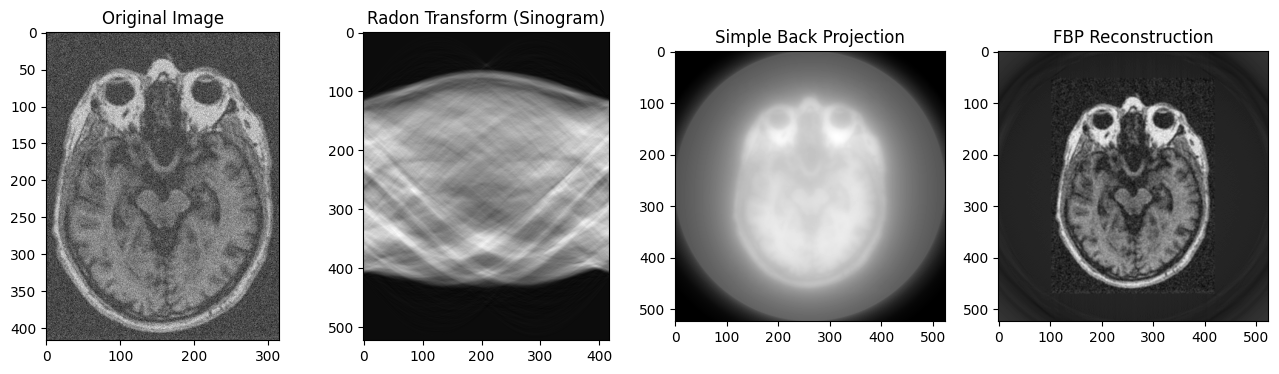

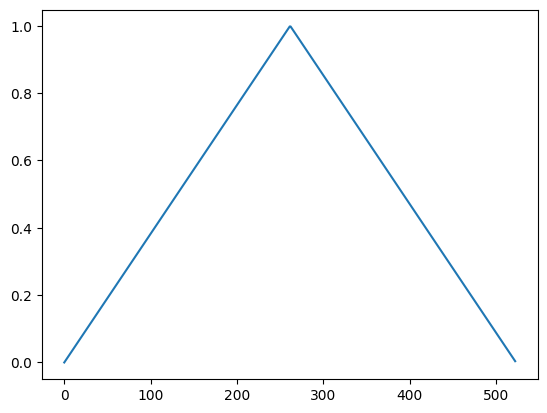

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft2, fftshift
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.data import astronaut
from skimage.filters import window


def upload_image():
    uploaded = files.upload()
    filename = next(iter(uploaded))
    image = Image.open(io.BytesIO(uploaded[filename])).convert('L')
    return np.array(image)

def radon_transform(image, theta):
    m, n = image.shape
    diagonal = int(np.sqrt(m**2 + n**2))
    pad = [int(np.ceil((diagonal - i)/2)) for i in (m, n)]
    padded_image = np.pad(image, [(pad[0], pad[0]), (pad[1], pad[1])], mode='constant', constant_values=0)

    radon_image = np.zeros((diagonal, len(theta)))

    for i, angle in enumerate(np.deg2rad(theta)):
        rotated = Image.fromarray(padded_image).rotate(-angle*180/np.pi, resample=Image.BILINEAR)
        rotated_array = np.array(rotated)
        projection = np.sum(rotated_array, axis=0) # along columns
        radon_image[:, i] = projection[:diagonal]
    return radon_image

def ramp_filter(sinogram, filter_size):
    output_size = sinogram.shape[0]

    # calculates DFT sample frequencies
    # The reshape(-1, 1) reshapes the array into a column vector
    f = np.fft.fftfreq(output_size).reshape(-1, 1)
    ramp = np.abs(2 * f)  # Ramp filter
    print(f"ramp shape: {ramp.shape}")
    # fft of sinogram, multiplied by the ramp filter (equivalent to conv)
    # ss = window('hann', ramp.shape[0])
    ss = np.hamming(ramp.shape[0])
    w = np.fft.fftshift(ss, axes=None)
    w = np.reshape(w, (523, 1))
    projection = np.fft.fft(sinogram, axis=0) * ramp * w
    filtered = np.fft.ifft(projection, axis=0).real
    return filtered, ramp

def fbp(sinogram, theta):
    sinogram, f = ramp_filter(sinogram, len(theta))
    output_size = sinogram.shape[0]
    reconstructed = np.zeros((output_size, output_size))

    for i, angle in enumerate(np.deg2rad(theta)):
        projection = np.tile(sinogram[:, i], (output_size, 1))
        rotated = Image.fromarray(projection).rotate(angle*180/np.pi, resample=Image.BILINEAR)
        reconstructed += np.array(rotated)

    return reconstructed / len(theta), f

def inverse_radon_transform(sinogram, theta):
    output_size = sinogram.shape[0]
    reconstructed_image = np.zeros((output_size, output_size))

    for i, angle in enumerate(np.deg2rad(theta)):
        projection = np.tile(sinogram[:, i], (output_size, 1))
        rotated_projection = Image.fromarray(projection).rotate(angle * 180 / np.pi, resample=Image.BILINEAR)
        reconstructed_image += np.array(rotated_projection)

    return reconstructed_image / len(theta)



def display_images(original, sinogram, reconstruction, fbp_reconstruction):
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 4, 2)
    plt.imshow(sinogram, cmap='gray')
    plt.title('Radon Transform (Sinogram)')
    plt.subplot(1, 4, 3)
    plt.imshow(reconstruction, cmap='gray')
    plt.title('Simple Back Projection')
    plt.subplot(1, 4, 4)
    plt.imshow(fbp_reconstruction, cmap='gray')
    plt.title('FBP Reconstruction')
    plt.show()

if __name__ == "__main__":
    image = upload_image()
    noise = np.random.randn(image.shape[0], image.shape[1])
    image = image + 40*noise
    theta = np.linspace(0, 180, max(image.shape), endpoint=False)
    sinogram = radon_transform(image, theta)
    simple_reconstruction = inverse_radon_transform(sinogram, theta)
    fbp_reconstruction, f = fbp(sinogram, theta)
    display_images(image, sinogram, simple_reconstruction, fbp_reconstruction)
    plt.plot(f)

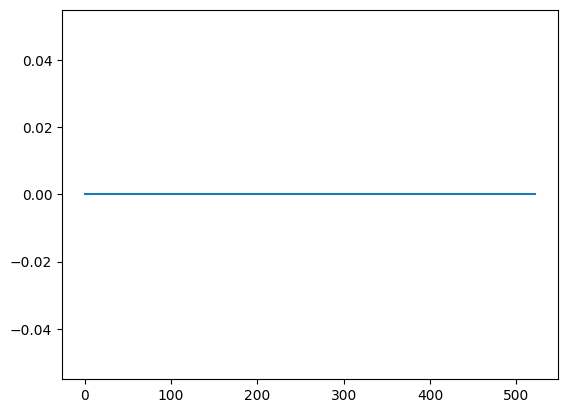

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft2, fftshift
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.data import astronaut
from skimage.filters import window
window1 = window('hann', (523, 1))
ww = np.fft.fftshift(window1, axes=None)
d = f*ww

plt.plot(d)


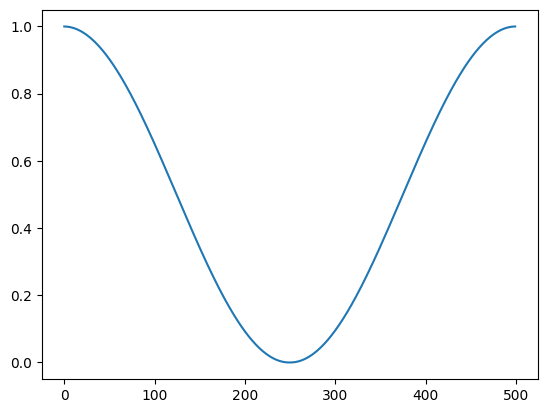

In [ ]:
w2 = np.fft.fftshift(window, axes=None)
plt.plot(w2)

In [ ]:
np.max(d)

0.0

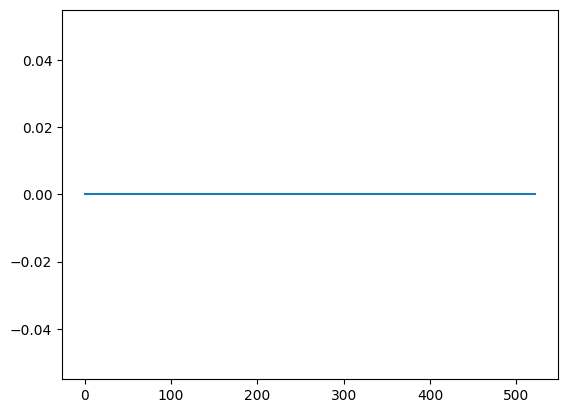

In [ ]:
plt.plot(window1)


In [ ]:
f.shape

(523, 1)

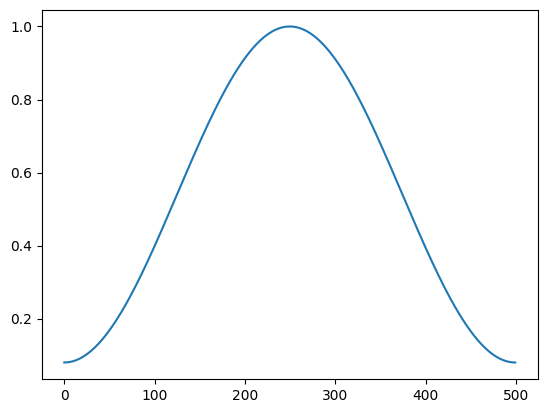

In [ ]:
aa = np.hamming(500)
plt.plot(aa)

Saving 2.png to 2 (15).png
ramp shape: (523, 1)


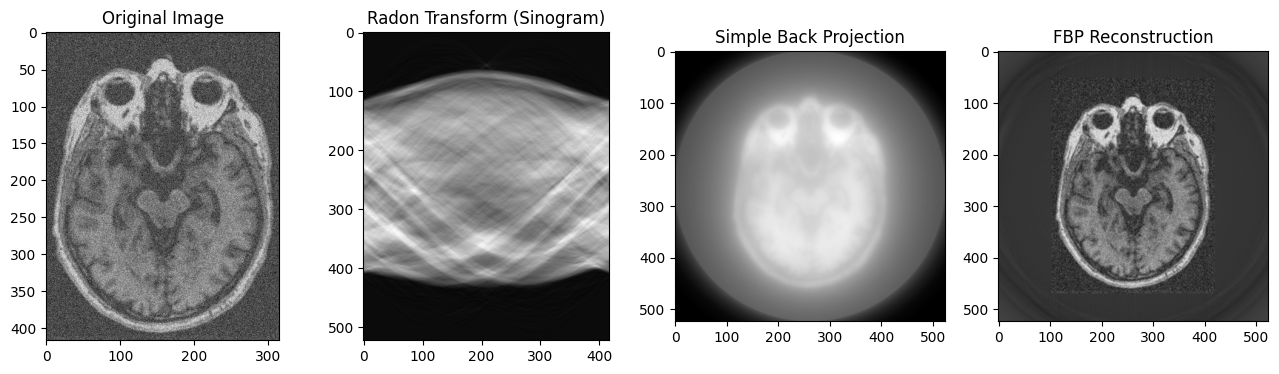

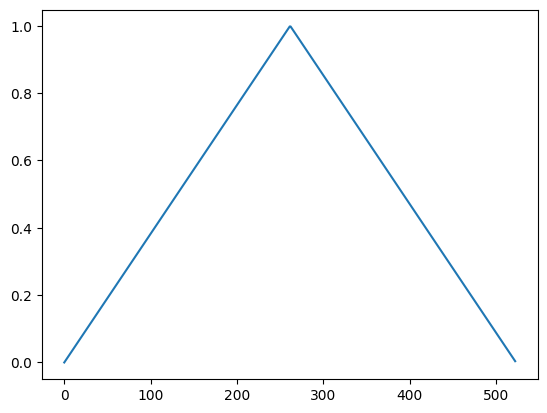

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft2, fftshift
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.data import astronaut
from skimage.filters import window


def upload_image():
    uploaded = files.upload()
    filename = next(iter(uploaded))
    image = Image.open(io.BytesIO(uploaded[filename])).convert('L')
    return np.array(image)

def radon_transform(image, theta):
    m, n = image.shape
    diagonal = int(np.sqrt(m**2 + n**2))
    pad = [int(np.ceil((diagonal - i)/2)) for i in (m, n)]
    padded_image = np.pad(image, [(pad[0], pad[0]), (pad[1], pad[1])], mode='constant', constant_values=0)

    radon_image = np.zeros((diagonal, len(theta)))

    for i, angle in enumerate(np.deg2rad(theta)):
        rotated = Image.fromarray(padded_image).rotate(-angle*180/np.pi, resample=Image.BILINEAR)
        rotated_array = np.array(rotated)
        projection = np.sum(rotated_array, axis=0) # along columns
        radon_image[:, i] = projection[:diagonal]
    return radon_image

def ramp_filter(sinogram, filter_size):
    output_size = sinogram.shape[0]

    # calculates DFT sample frequencies
    # The reshape(-1, 1) reshapes the array into a column vector
    f = np.fft.fftfreq(output_size).reshape(-1, 1)
    ramp = np.abs(2 * f)  # Ramp filter
    print(f"ramp shape: {ramp.shape}")
    # fft of sinogram, multiplied by the ramp filter (equivalent to conv)
    # ss = window('hann', ramp.shape[0])
    # ss = np.hamming(ramp.shape[0])
    # w = np.fft.fftshift(ss, axes=None)
    # w = np.reshape(w, (523, 1))
    projection = np.fft.fft(sinogram, axis=0) * ramp
    filtered = np.fft.ifft(projection, axis=0).real
    return filtered, ramp

def fbp(sinogram, theta):
    sinogram, f = ramp_filter(sinogram, len(theta))
    output_size = sinogram.shape[0]
    reconstructed = np.zeros((output_size, output_size))

    for i, angle in enumerate(np.deg2rad(theta)):
        projection = np.tile(sinogram[:, i], (output_size, 1))
        rotated = Image.fromarray(projection).rotate(angle*180/np.pi, resample=Image.BILINEAR)
        reconstructed += np.array(rotated)

    return reconstructed / len(theta), f

def inverse_radon_transform(sinogram, theta):
    output_size = sinogram.shape[0]
    reconstructed_image = np.zeros((output_size, output_size))

    for i, angle in enumerate(np.deg2rad(theta)):
        projection = np.tile(sinogram[:, i], (output_size, 1))
        rotated_projection = Image.fromarray(projection).rotate(angle * 180 / np.pi, resample=Image.BILINEAR)
        reconstructed_image += np.array(rotated_projection)

    return reconstructed_image / len(theta)



def display_images(original, sinogram, reconstruction, fbp_reconstruction):
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 4, 2)
    plt.imshow(sinogram, cmap='gray')
    plt.title('Radon Transform (Sinogram)')
    plt.subplot(1, 4, 3)
    plt.imshow(reconstruction, cmap='gray')
    plt.title('Simple Back Projection')
    plt.subplot(1, 4, 4)
    plt.imshow(fbp_reconstruction, cmap='gray')
    plt.title('FBP Reconstruction')
    plt.show()

if __name__ == "__main__":
    image = upload_image()
    noise = np.random.randn(image.shape[0], image.shape[1])
    image = image + 40*noise
    theta = np.linspace(0, 180, max(image.shape), endpoint=False)
    theta = np.linspace(0, 180, max(image.shape), endpoint=False)
    sinogram = radon_transform(image, theta)
    simple_reconstruction = inverse_radon_transform(sinogram, theta)
    fbp_reconstruction, f = fbp(sinogram, theta)
    display_images(image, sinogram, simple_reconstruction, fbp_reconstruction)
    plt.plot(f)

In [ ]:
image.shape

(417, 316)